✅ Cell 1: Imports for modeling


In [11]:
import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath(".."))


In [17]:
# Import necessary libraries for data manipulation, visualization, model building, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn utilities for splitting data, scaling, modeling, and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, f1_score, confusion_matrix, classification_report

# Import custom helper functions from utils if applicable (e.g., encoding and balancing functions)
from utils.data_utils import encode_categoricals, transform_and_balance

# Set plot style for seaborn
sns.set(style='whitegrid')


Cell 2: Load the cleaned data from Task 1

In [18]:
# Load the cleaned fraud dataset that was processed and saved in Task 1
fraud_df = pd.read_csv("../data/processed/cleaned_fraud_data.csv")
print(f"Loaded cleaned fraud data with shape: {fraud_df.shape}")

# Display the first few rows to verify data load
fraud_df.head()


Loaded cleaned fraud data with shape: (151112, 29)


,purchase_time,user_id,signup_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Ads,source_Direct,source_SEO,sex_F,sex_M
0,2015-02-21 10:03:37,2,2015-01-11 03:47:13,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,8.802175e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2015-09-26 21:32:16,4,2015-06-02 16:40:57,41,MKFUIVOHLJBYN,Direct,Safari,F,38,2.785906e+09,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2015-08-13 11:53:07,8,2015-05-28 07:53:06,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,3.560567e+08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2015-05-20 23:06:42,9,2015-05-16 15:58:32,62,IEZOHXPZBIRTE,SEO,FireFox,M,21,7.591047e+08,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2015-03-04 20:56:37,12,2015-01-10 06:25:12,35,MSNWCFEHKTIOY,Ads,Safari,M,19,2.985180e+09,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Cell 3: Encode categorical columns

In [19]:
# Define categorical columns that need to be encoded to numeric for modeling
categorical_cols = ['browser', 'source', 'sex']

# Use a helper function to encode these categorical features into numerical representations
fraud_encoded = encode_categoricals(fraud_df, categorical_cols)
print("Categorical columns encoded successfully.")


Categorical columns encoded successfully.


Cell 4: Prepare features and target

In [20]:
# Separate target variable 'class' which indicates fraud (1) or not (0)
y = fraud_encoded['class']

# Drop the target from features to get the input matrix X
X = fraud_encoded.drop(columns=['class'])

print("Features and target separated.")
print(f"Feature set shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


Features and target separated.
Feature set shape: (151112, 38)
Target distribution:
class
0    136961
1     14151
Name: count, dtype: int64


Cell 5: Train-test split and balancing

🚨 Dropping columns with all NaNs: ['time_since_last_transaction']
✅ Final NaNs in X_train:
 Series([], dtype: int64)
✅ Shape before SMOTE: (105778, 30)
Train-test split and balancing complete.
X_train shape: (191744, 30)
X_test shape: (45334, 30)
y_train distribution:
class
0    95872
1    95872
Name: count, dtype: int64


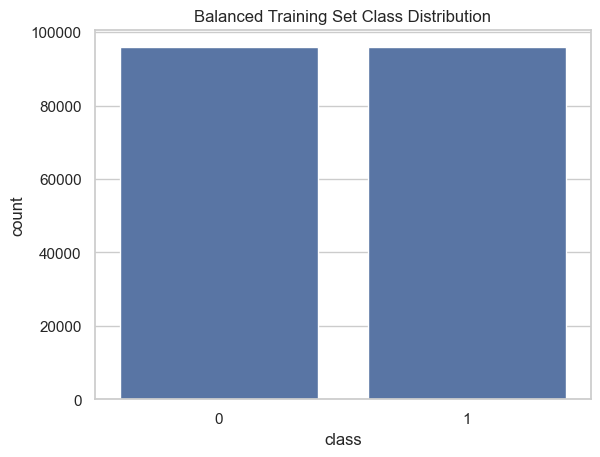

In [21]:
# Split the data into training and test sets and apply balancing technique (SMOTE) on the train set
X_train, X_test, y_train, y_test = transform_and_balance(X, y)

print("Train-test split and balancing complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{pd.Series(y_train).value_counts()}")

# Visualize the balanced training set class distribution
sns.countplot(x=y_train)
plt.title("Balanced Training Set Class Distribution")
plt.show()


Cell 6: Feature scaling

In [22]:
# Initialize a StandardScaler to normalize feature values for better model convergence
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler.")


Features scaled using StandardScaler.


Cell 7: Initialize models

In [23]:
# Instantiate Logistic Regression as a simple interpretable baseline model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate Random Forest as a powerful ensemble model for better prediction performance
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


Cell 8: Train Logistic Regression

In [24]:
# Train Logistic Regression on the scaled, balanced training data
logreg.fit(X_train_scaled, y_train)
print("Logistic Regression trained.")


Logistic Regression trained.


Cell 9: Train Random Forest

In [25]:
# Train Random Forest classifier on the scaled, balanced training data
rf.fit(X_train_scaled, y_train)
print("Random Forest trained.")


Random Forest trained.


Cell 10: Define evaluation function

In [26]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate model using AUC-PR, F1-Score, confusion matrix, and classification report.
    Plot Precision-Recall curve for performance visualization.
    """
    # Predict probabilities and classes on test data
    y_probs = model.predict_proba(X_test)[:,1]
    y_preds = model.predict(X_test)

    # Compute Precision-Recall curve and area under curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    auc_pr = auc(recall, precision)
    f1 = f1_score(y_test, y_preds)
    cm = confusion_matrix(y_test, y_preds)
    
    # Print key evaluation metrics
    print(f"AUC-PR: {auc_pr:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_preds))

    # Plot the Precision-Recall curve
    plt.plot(recall, precision, label=f'PR Curve (AUC={auc_pr:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()


Cell 11: Evaluate Logistic Regression

Logistic Regression Evaluation:
AUC-PR: 0.4197
F1-Score: 0.2807
Confusion Matrix:
[[27257 13832]
 [ 1294  2951]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     41089
           1       0.18      0.70      0.28      4245

    accuracy                           0.67     45334
   macro avg       0.57      0.68      0.53     45334
weighted avg       0.88      0.67      0.74     45334



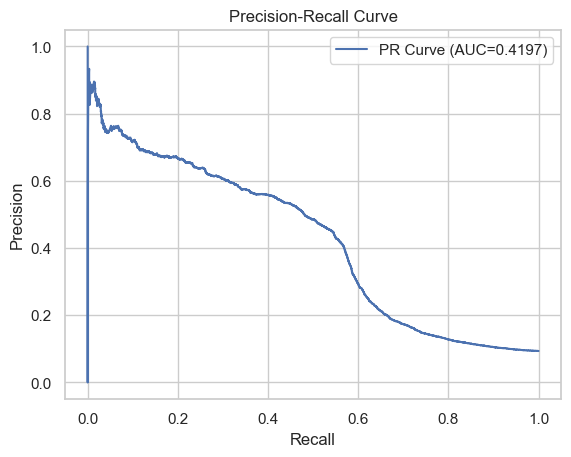

In [27]:
print("Logistic Regression Evaluation:")
evaluate_model(logreg, X_test_scaled, y_test)


Cell 12: Evaluate Random Forest

Random Forest Evaluation:
AUC-PR: 0.6295
F1-Score: 0.6988
Confusion Matrix:
[[41085     4]
 [ 1963  2282]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.54      0.70      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



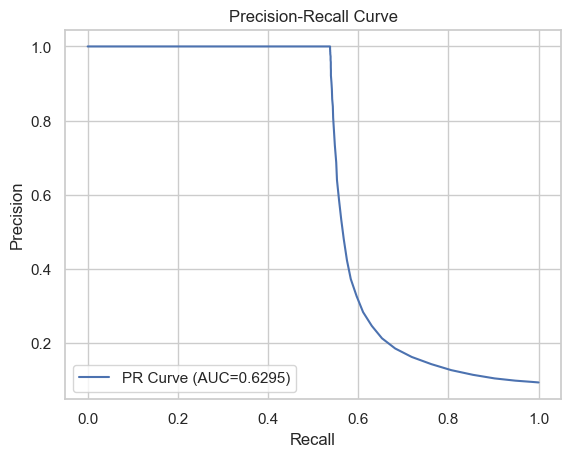

In [28]:
print("Random Forest Evaluation:")
evaluate_model(rf, X_test_scaled, y_test)


Cell 13: Model selection conclusion

In [29]:
print("""
Summary and model selection:

- Logistic Regression provides a simple interpretable baseline.
- Random Forest, as a more powerful ensemble, usually yields better detection performance on imbalanced fraud data.
- Evaluate based on metrics like AUC-PR and F1-score, which balance precision and recall.
- The chosen model should minimize false positives and false negatives, critical in fraud detection.
""")



Summary and model selection:

- Logistic Regression provides a simple interpretable baseline.
- Random Forest, as a more powerful ensemble, usually yields better detection performance on imbalanced fraud data.
- Evaluate based on metrics like AUC-PR and F1-score, which balance precision and recall.
- The chosen model should minimize false positives and false negatives, critical in fraud detection.



Cell 1: Import XGBoost and other needed libraries

In [30]:
import xgboost as xgb
from sklearn.metrics import precision_recall_curve, auc, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Cell 2: Initialize and train the XGBoost model

In [31]:
# Initialize the XGBoost classifier with a fixed random state for reproducibility
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the balanced training data
xgb_model.fit(X_train, y_train)


c:\Users\Bob\Desktop\10Acadamy\week8&9\fraud-detection\.fraud\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:56:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

Cell 3: Make predictions and evaluate the model

In [32]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # probabilities for positive class

# Calculate precision-recall curve and AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Classification report for detailed metrics
report = classification_report(y_test, y_pred)

print(f"XGBoost Evaluation:\nAUC-PR: {auc_pr:.4f}\nF1-Score: {f1:.4f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


XGBoost Evaluation:
AUC-PR: 0.6174
F1-Score: 0.6898
Confusion Matrix:
 [[40988   101]
 [ 1957  2288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       0.96      0.54      0.69      4245

    accuracy                           0.95     45334
   macro avg       0.96      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334



Cell 4: Plot the Precision-Recall Curve

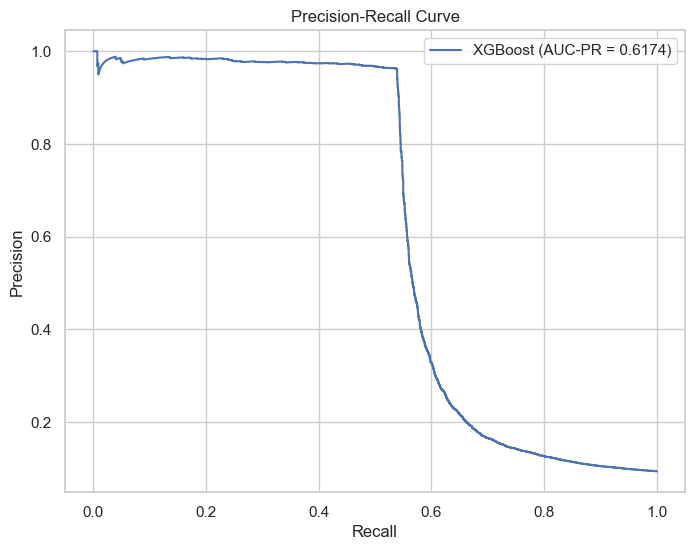

In [33]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'XGBoost (AUC-PR = {auc_pr:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()